# GATs w/ PyTorch & random graphs

In [1]:
import gat
import utils
import torch
import torch.nn.functional as fn

from torch import nn

In [2]:
torch.manual_seed(1641869066323)

### Generate a random graph

In [3]:
num_nodes = 16
edges = utils.gen_edges(num_nodes)

print(f"nodes: {num_nodes} {list(range(num_nodes))}")
print(f"edges: {len(edges)} {edges}")

nodes: 16 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
edges: 21 [(0, 12), (0, 8), (1, 14), (2, 14), (3, 4), (4, 9), (5, 15), (7, 10), (8, 5), (8, 6), (9, 1), (9, 11), (10, 13), (11, 6), (11, 0), (12, 1), (12, 13), (13, 4), (14, 2), (15, 1), (15, 13)]


In [4]:
adj = utils.make_adj_mat(num_nodes, edges)
print(f"adjacency: {adj.shape}")
print(adj)

adjacency: torch.Size([16, 16])
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
      

In [5]:
points = torch.randn(num_nodes, 2)
print(f"points: {points.shape}")
print(points)

points: torch.Size([16, 2])
tensor([[ 0.9319,  1.1551],
        [-1.1319,  1.2684],
        [ 1.2875, -0.3274],
        [-0.5713,  1.0630],
        [ 0.2114,  0.0696],
        [ 0.5690,  0.4814],
        [-0.9984,  0.3065],
        [ 2.4097, -2.1730],
        [-1.9497, -0.0971],
        [ 0.2953, -0.6918],
        [-0.9576,  0.2695],
        [-3.2131,  0.3073],
        [ 0.7636,  0.8126],
        [-0.8653, -1.4610],
        [ 0.0817,  2.0672],
        [-0.7503, -0.2133]])


In [6]:
features = torch.randn(num_nodes, num_nodes)
print(f"features: {features.shape}")

features: torch.Size([16, 16])


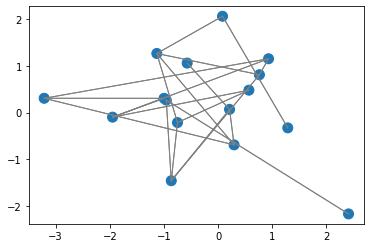

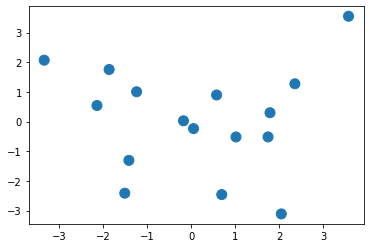

In [7]:
utils.plot_graph(adj, points)
utils.plot_pca(features)

### Explore GATs

In [8]:
head_sizes = [8, 1]
head_feats = 8
dim_features = features.shape[1]
dim_embeds = 6

In [9]:
graph = gat.Graph(edges, features)
model = gat.GAT(head_sizes, head_feats, dim_features, dim_embeds)
model

GAT(
  (seq): Sequential(
    (0): AttentionLayer(
      (heads): ModuleList(
        (0): AttentionHead(
          (proj_weights): Linear(in_features=16, out_features=8, bias=False)
          (attn_weights): Linear(in_features=16, out_features=1, bias=False)
        )
        (1): AttentionHead(
          (proj_weights): Linear(in_features=16, out_features=8, bias=False)
          (attn_weights): Linear(in_features=16, out_features=1, bias=False)
        )
        (2): AttentionHead(
          (proj_weights): Linear(in_features=16, out_features=8, bias=False)
          (attn_weights): Linear(in_features=16, out_features=1, bias=False)
        )
        (3): AttentionHead(
          (proj_weights): Linear(in_features=16, out_features=8, bias=False)
          (attn_weights): Linear(in_features=16, out_features=1, bias=False)
        )
        (4): AttentionHead(
          (proj_weights): Linear(in_features=16, out_features=8, bias=False)
          (attn_weights): Linear(in_features=16, 

In [10]:
embeds= model(graph)
print(f"embeds: {embeds.shape}")
print(embeds)

embeds: torch.Size([16, 6])
tensor([[-0.1311,  0.0341,  0.1586,  0.1457,  0.1820,  0.0262],
        [-0.0016,  0.0136,  0.0054,  0.0547,  0.0543,  0.0420],
        [ 0.0063,  0.2475, -0.5097, -0.1424,  0.0745,  0.5585],
        [ 0.2438, -0.1333,  0.2572, -0.1302, -0.2186,  0.2230],
        [ 0.2245, -0.0817,  0.1951, -0.0275, -0.1297,  0.1383],
        [-0.0114,  0.0875,  0.1472,  0.0346,  0.0586, -0.1114],
        [-0.0133,  0.2020,  0.1426,  0.1488,  0.1542,  0.0574],
        [-0.0765, -0.0652,  0.0026,  0.1961, -0.1242,  0.0121],
        [-0.0800,  0.0654,  0.1439,  0.1263,  0.1175,  0.0350],
        [ 0.0904,  0.0713,  0.1409,  0.0539,  0.0655,  0.0891],
        [ 0.0353, -0.0801,  0.0751,  0.1592, -0.1083,  0.0269],
        [-0.0194,  0.0749,  0.1075,  0.1741,  0.1236,  0.0956],
        [-0.0531, -0.0957,  0.1645,  0.1317,  0.1004,  0.0480],
        [ 0.1317, -0.0769,  0.1379,  0.0664, -0.0703, -0.0287],
        [-0.0197,  0.1643, -0.2827, -0.0676,  0.1033,  0.3967],
        [ 0.

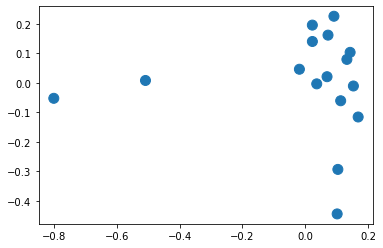

In [11]:
with torch.no_grad():
    utils.plot_pca(embeds)

### Training

In [12]:
num_classes = 3
labels = torch.randint(0, num_classes, (num_nodes,))
print(f"labels: {labels.shape}")
print(labels)

labels: torch.Size([16])
tensor([0, 2, 0, 1, 2, 2, 0, 1, 0, 2, 1, 1, 1, 2, 1, 0])


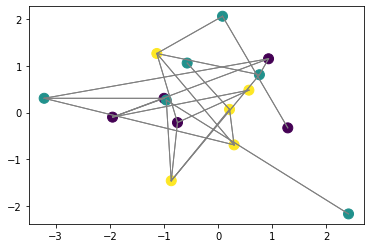

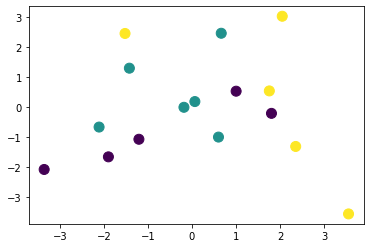

In [13]:
utils.plot_graph(adj, points, colors=labels)
with torch.no_grad():
    utils.plot_pca(features, colors=labels)

In [14]:
epochs = 100
learning_rate = 0.01
model = gat.GAT(head_sizes, head_feats, dim_features, num_classes)

In [15]:
xentropy = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [16]:
for i in range(epochs):
    print(f"Epoch {i+1:<3} ------")
    gat.train(model, graph, labels, xentropy, optimizer)
    gat.evaluate(model, graph, labels)
    print()
print("done")

Epoch 1   ------
loss: 1.129256
accuracy: 43.8%

Epoch 2   ------
loss: 1.063131
accuracy: 43.8%

Epoch 3   ------
loss: 1.011107
accuracy: 56.2%

Epoch 4   ------
loss: 0.967746
accuracy: 56.2%

Epoch 5   ------
loss: 0.928916
accuracy: 62.5%

Epoch 6   ------
loss: 0.891413
accuracy: 56.2%

Epoch 7   ------
loss: 0.853237
accuracy: 62.5%

Epoch 8   ------
loss: 0.814150
accuracy: 62.5%

Epoch 9   ------
loss: 0.774745
accuracy: 68.8%

Epoch 10  ------
loss: 0.736226
accuracy: 75.0%

Epoch 11  ------
loss: 0.699662
accuracy: 75.0%

Epoch 12  ------
loss: 0.665203
accuracy: 75.0%

Epoch 13  ------
loss: 0.631578
accuracy: 75.0%

Epoch 14  ------
loss: 0.597286
accuracy: 75.0%

Epoch 15  ------
loss: 0.561789
accuracy: 75.0%

Epoch 16  ------
loss: 0.525153
accuracy: 87.5%

Epoch 17  ------
loss: 0.487093
accuracy: 87.5%

Epoch 18  ------
loss: 0.447138
accuracy: 87.5%

Epoch 19  ------
loss: 0.405812
accuracy: 87.5%

Epoch 20  ------
loss: 0.362675
accuracy: 87.5%

Epoch 21  ------
los

### Visualize

In [17]:
embeds = model(graph)
logits = fn.softmax(embeds, dim=1)
y_pred = logits.argmax(dim=1)

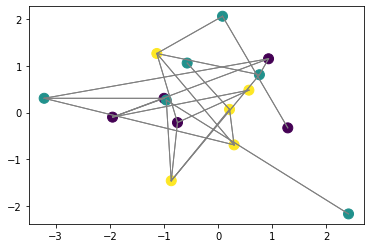

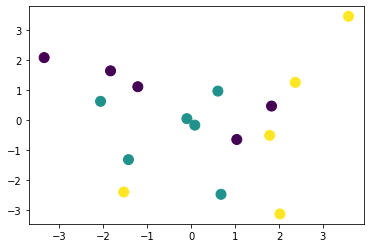

In [18]:
utils.plot_graph(adj, points, colors=y_pred)
with torch.no_grad():
    utils.plot_pca(features, colors=y_pred)

### Inductive test

In [19]:
node_feats = torch.zeros(1, graph.dim_feats)
node_point = torch.rand(1, 2)
node_idx = graph.num_nodes

new_edges = list(edges)
for neighbor in torch.randint(num_nodes, (3,)):
    new_edges.append((node_idx, int(neighbor)))
new_adj = utils.make_adj_mat(num_nodes + 1, new_edges)

new_points = torch.cat([points, node_point], dim=0)
new_feats = torch.cat([features, node_feats], dim=0)

new_graph = gat.Graph(new_edges, new_feats)

In [20]:
embeds = model(new_graph)
new_embed = embeds[-1, :]
print(f"new embed: {new_embed.shape}")
print(new_embed)

new embed: torch.Size([3])
tensor([ 3.5681, -7.5836, -3.0780], grad_fn=<SliceBackward>)


In [21]:
logits = fn.softmax(embeds, dim=1)
y_pred = logits.argmax(dim=1)
new_label = y_pred[-1]
print(f"new pred label: {new_label}")

new pred label: 0


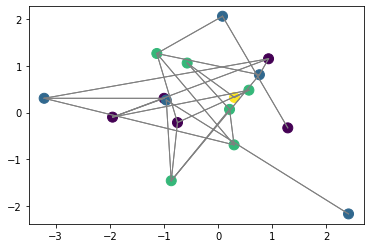

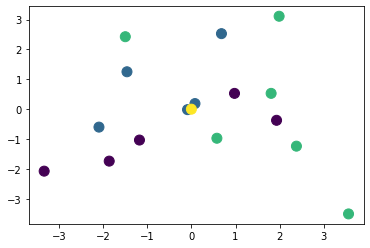

In [22]:
y_pred[-1] = num_classes # give the new point a different color
utils.plot_graph(new_adj, new_points, colors=y_pred)
with torch.no_grad():
    utils.plot_pca(new_feats, colors=y_pred)